In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,LassoCV
from sklearn import metrics
import warnings 

In [5]:
warnings.filterwarnings("ignore")

In [6]:
dataset = pd.read_csv("insurance.csv")

In [7]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
dataset.shape

(1338, 7)

In [9]:
dataset.info()  #3 kategorik alan var 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
dataset.isna().sum() # missing value yok 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# istatistiksel özelliklere ve veriye genel bir bakış 

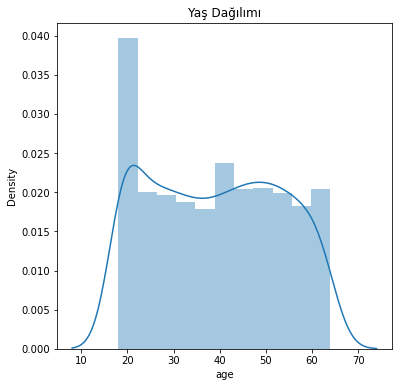

In [11]:
plt.figure(figsize=(6,6))
sns.distplot(dataset['age'])
plt.title("Yaş Dağılımı")
plt.show()

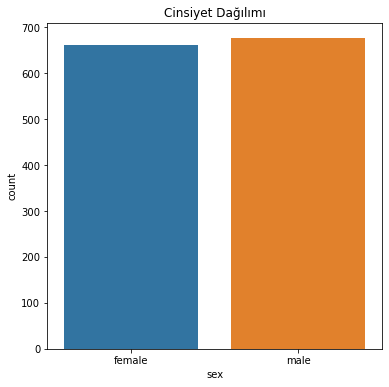

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=dataset)
plt.title("Cinsiyet Dağılımı")
plt.show()

In [13]:
dataset["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

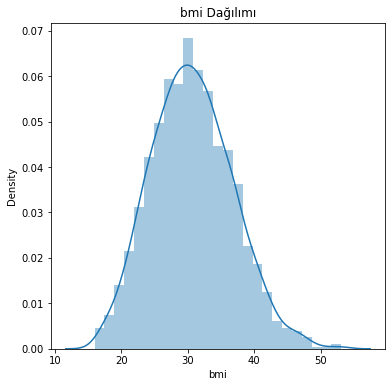

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(dataset['bmi'])
plt.title("bmi Dağılımı")
plt.show() # normal dağılıma çok yakın yani ortalama etrafında bir dağılım olmuş 

## normal bmi aralığı 18.5 ile 24.9 

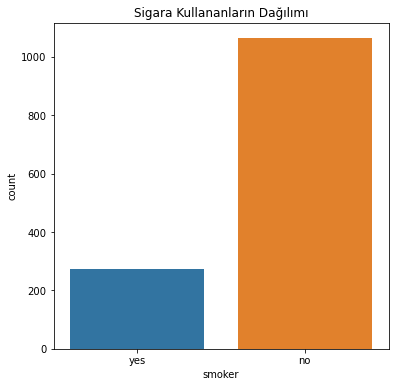

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x="smoker",data=dataset)
plt.title("Sigara Kullananların Dağılımı")
plt.show()

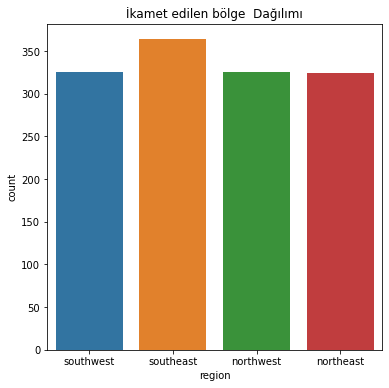

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x="region",data=dataset)
plt.title("İkamet edilen bölge  Dağılımı")
plt.show()

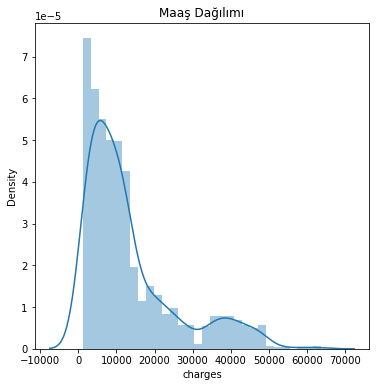

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(dataset['charges'])
plt.title("Maaş Dağılımı")
plt.show() 

# KATEGORİK VERİLERİN ENCODİNG EDİLMESİ 

In [18]:
#cinsiyet kolonunun dönüştürülmesi
dataset.replace({"sex":{'male':0, 'female':1}},inplace=True)

#smoker kolonunun dönüştürülmesi
dataset.replace({'smoker':{'yes':0,'no':1}},inplace = True)

#bölge kolonunun dönüştürülmesi
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace = True)

In [19]:
dataset["smoker"]

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    1
1335    1
1336    1
1337    0
Name: smoker, Length: 1338, dtype: int64

In [20]:
X = dataset.drop(columns='charges',axis=1) #bağımsız değişkenler
Y = dataset["charges"]# bağımlı değişken(hedef değişken)

In [21]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [22]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# VERİ SETİNİ EĞİTİM VE TEST OLARAK AYIRMA 

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# MODEL EĞİTME AŞAMASI

In [25]:
regressor = LinearRegression()

In [26]:
model = regressor.fit(X_train,Y_train)

In [27]:
training_data_prediction = regressor.predict(X_train)

In [28]:
model.intercept_

11357.668742540935

In [29]:
r2_train = metrics.r2_score(Y_train,training_data_prediction)
r2_train

0.751505643411174

In [30]:
test_data_prediction = regressor.predict(X_test)

In [31]:
r2_test = metrics.r2_score(Y_test,test_data_prediction)
r2_test# eğitim ve test verileri için r kare değerlerfi birbirine çok yakın bu durumda eğitim aşamasında bir overfitting olmadığını ve başarılı bir eğitim olduğunu gösteriyor 

0.7447273869684077

## EĞİTİLMİŞ SİSTEM İLE TAHMİN YAPMA

In [32]:
input_data=(37,1,27.74,3,1,3) #8240.5896



input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

prediction

array([8307.29448212])

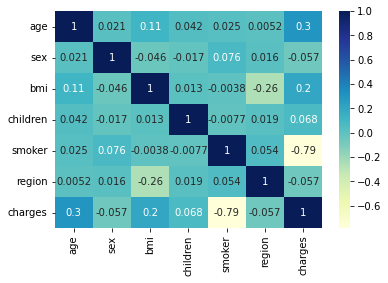

In [33]:
dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [36]:
regressor.coef_

array([   251.40512196,     26.11715966,    330.64637157,    580.27438296,
       -23928.10171061,    212.22242728])

In [37]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=50,l1_ratio=0.9)

In [38]:
enet.fit(X_train,Y_train)

ElasticNet(alpha=50, l1_ratio=0.9)

In [39]:
input_data=(37,1,27.74,3,1,3) #8240.5896



input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = enet.predict(input_data_reshaped)

prediction

array([11989.14193993])

# yeni alan

In [40]:
dataset_2 = dataset

In [41]:
dataset_2

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [42]:
X_new = dataset_2.drop(columns='charges',axis=1) #bağımsız değişkenler

In [43]:
sigara_icenler = dataset_2[X_new.smoker==0]
sigara_icmeyenler = dataset_2[X_new.smoker==1]
sigara_icenler

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
11,62,1,26.290,0,0,0,27808.72510
14,27,0,42.130,0,0,0,39611.75770
19,30,0,35.300,0,0,1,36837.46700
23,34,1,31.920,1,0,2,37701.87680
...,...,...,...,...,...,...,...
1313,19,1,34.700,2,0,1,36397.57600
1314,30,1,23.655,3,0,3,18765.87545
1321,62,0,26.695,0,0,2,28101.33305
1323,42,1,40.370,2,0,0,43896.37630


In [51]:
X_new = dataset_2.drop(columns='charges',axis=1) #bağımsız değişkenler
Y_new = dataset["charges"]# bağımlı değişken(hedef değişken)

In [52]:
X_new_train,X_new_test,Y_new_train,Y_new_test = train_test_split(X_new,Y_new,test_size=0.2,random_state=42)

In [53]:
regressor2 = LinearRegression()
model = regressor2.fit(X_new_train,Y_new_train)
training_data_prediction = regressor2.predict(X_new_train)

test_data_prediction = regressor2.predict(X_new_test)


In [54]:
model.intercept_

10357.950030290896

In [55]:
r2_train = metrics.r2_score(Y_new_train,training_data_prediction)
r2_train

0.6142484748239281

In [56]:
r2_test = metrics.r2_score(Y_new_test,test_data_prediction)
r2_test

0.5559888965638502

In [58]:
input_data=(37,1,27.74,3,1,3) #8240.5896



input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor2.predict(input_data_reshaped)

prediction

array([8908.41327891])

## GRADİENT BOOST REGRESSOR

In [59]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb_model = xgb.fit(X_train,Y_train)
# predicting values for test data
xgb_Ypredict = xgb_model.predict(X_test)
#print('MSE of XGBRegressor : ' + str(round(mean_squared_error(Y_test,xgb_Ypredict),2)))
print('r2 score of XGBRegressor : ' + str(round(metrics.r2_score(Y_test,xgb_Ypredict),2)))
print('#####################################################')

r2 score of XGBRegressor : 0.82
#####################################################


In [60]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, xgb_Ypredict)
rmse = np.sqrt(mse)
rmse

5173.813744262509

In [62]:
input_data=(37,1,27.74,3,1,3)
##xgb_Ypredict = xgb_model.predict(input_data)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = xgb_model.predict(input_data_reshaped)
prediction

array([7393.069], dtype=float32)